# **ABSTRACT**
Dataset extraido de Kaggle llamado "Conjunto de datos de titulares de noticias para la detección de sarcasmo".

La base de datos ofrece 26709 conjuntos de datos de titulares de noticias en ingles de dos sitios web de noticias (EEUU año 2019) para la detección de sarcasmo. Los datos que describen al dataset son: is_sarcastic: 1 si el registro es sarcástico, en caso contrario 0, headline: el titular del artículo de noticias, article_link: enlace al artículo de noticias original. Útil para recopilar datos complementarios.

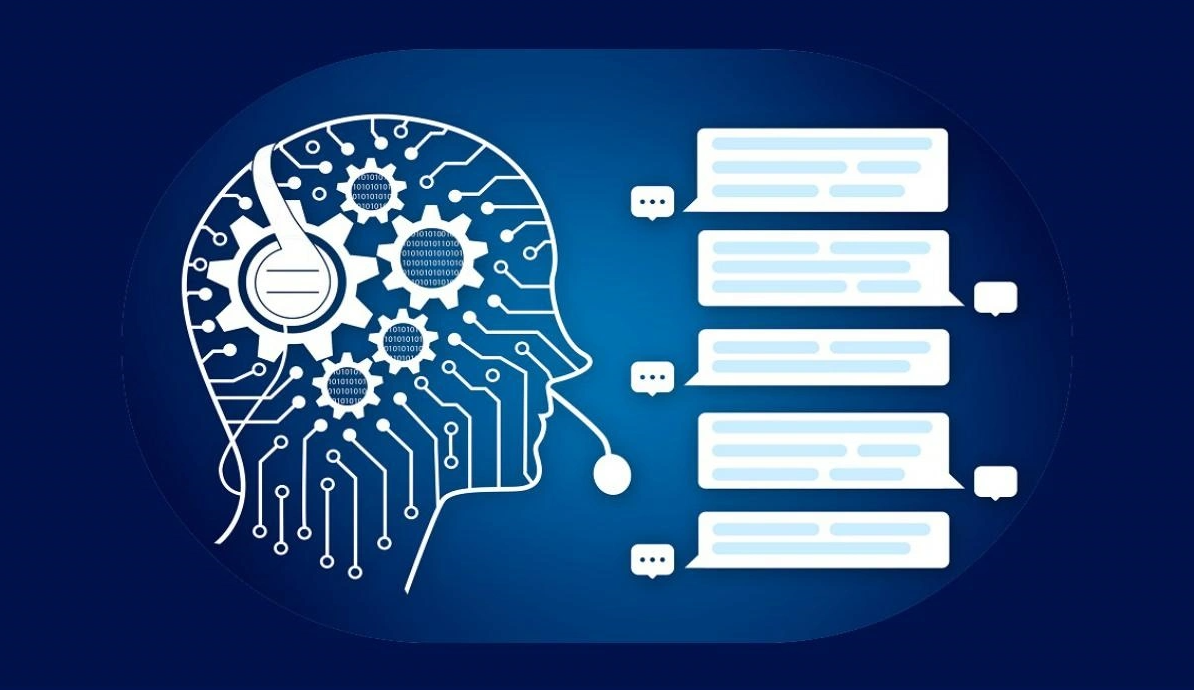

# Contenido


Elegi este dataset por contener datos reales de dos sitios web de noticias extraidos de dos sitios web de noticias:

Dado que los titulares de las noticias están escritos por profesionales de manera formal, no hay errores de ortografía ni uso informal. Esto reduce la escasez y también aumenta la posibilidad de encontrar incrustaciones previamente entrenadas.

Además, dado que el único propósito de TheOnion es publicar noticias sarcásticas, obtenemos etiquetas de alta calidad con mucho menos ruido en comparación con los conjuntos de datos de Twitter.

Para obtener datos de Twetter utilizando su API es necesaria una contribucion, en cambio los datos de este dataset son publicos y gratuitos.

A diferencia de los tweets que son respuestas a otros tweets, los titulares de noticias que obtuvimos son independientes. Esto nos ayudaría a distinguir los elementos sarcásticos reales.


*   **TheOnion** que tiene como objetivo producir versiones sarcásticas de los acontecimientos actuales y recopilamos todos los titulares de las categorías Noticias breves y Noticias en fotos (sarcásticas).
*   **HuffPost** que posee titulares de noticias reales (no sarcásticos).


# Objetivos

El objetivo principal de este dataset es identificar frases sarcásticas y distinguir entre noticias falsas y noticias legítimas.

Objetivos secundarios: Practica y aprendizaje de modelos usando lenguaje natural.

# Citación

1. Misra, Rishabh and Prahal Arora. "Sarcasm Detection using News Headlines Dataset." AI Open (2023).
2. Misra, Rishabh and Jigyasa Grover. "Sculpting Data for ML: The first act of Machine Learning." ISBN 9798585463570 (2021).

Enlace a [rishabhmisra.github.io/publications](https://) como fuente de este conjunto de datos. ¡Gracias!


# **Pre-Analisis**

## Carga de Librerias


In [ ]:
#Librerias para Datos

import json
import pandas as pd
import numpy as np

#Librerias para Graficos

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#Librerias para modelo

import tensorflow as tf
# Importar clases Tokenizer y pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


## Carga de Datos

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/learning-datasets/sarcasm.json -O /tmp/sarcasm.json

# Utiliza el comando !wget para descargar el archivo JSON desde el enlace proporcionado.
# El parámetro --no-check-certificate indica que no se debe verificar el certificado SSL.
# -O /tmp/sarcasm.json especifica la ubicación y el nombre del archivo donde se guardará el JSON.


with open("/tmp/sarcasm.json", 'r') as f:     # Utilizo with para que el archivo se cierre correctamente después de su uso.
    datastore = json.load(f)                  # Convierto el contenido JSON en una estructura de datos de Python.


oraciones = []
etiquetas = []
urls = []

# Itero sobre cada elemento del JSON y extraer los titulares de noticias, las etiquetas de sarcasmo y los enlaces a los artículos originales.

for item in datastore:
    oraciones.append(item['headline'])      # headline sera una oración.
    etiquetas.append(item['is_sarcastic'])     # is_sarcastic sera la etiqueta.
    urls.append(item['article_link'])       # article_link sera la URL.

# Creo un diccionario con los datos: titulares, etiquetas y enlaces.

data = {
    'headline': oraciones,
    'is_sarcastic': etiquetas,
    'article_link': urls
}

# Creo el DataFrame a partir del diccionario.
df = pd.DataFrame(data)


--2024-04-25 01:20:07--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2024-04-25 01:20:07 (187 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
df.head()

,headline,is_sarcastic,article_link
0,former versace store clerk sues over secret 'b...,0,https://www.huffingtonpost.com/entry/versace-b...
1,the 'roseanne' revival catches up to our thorn...,0,https://www.huffingtonpost.com/entry/roseanne-...
2,mom starting to fear son's web series closest ...,1,https://local.theonion.com/mom-starting-to-fea...
3,"boehner just wants wife to listen, not come up...",1,https://politics.theonion.com/boehner-just-wan...
4,j.k. rowling wishes snape happy birthday in th...,0,https://www.huffingtonpost.com/entry/jk-rowlin...


In [ ]:
print("Cantidad de datos:", df.shape[0])
print("Cantidad de columnas:", df.shape[1])

Cantidad de datos: 26709
Cantidad de columnas: 3


In [ ]:
df.columns

Index(['headline', 'is_sarcastic', 'article_link'], dtype='object')

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   headline      26709 non-null  object
 1   is_sarcastic  26709 non-null  int64 
 2   article_link  26709 non-null  object
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


,is_sarcastic
count,26709.000000
mean,0.438953
std,0.496269
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


Todas las columnas tienen el tipo de dato correcto

In [ ]:
df.nunique()

headline        26602
is_sarcastic        2
article_link    26708
dtype: int64

# **COMPRENCIÓN DE LOS DATOS (EDA)**

##**Descripcion de columnas:**

Headline   

    El titular del artículo de noticias.
    Variable categorica (obj).

Is_sarcastic

    1 si el registro es sarcástico, en caso contrario 0.
    Variable numérica continua (int).

Article_link   

    Enlace al artículo de noticias original. Útil para recopilar datos complementarios.
    Variable categorica - URL (obj).

## Analisis univariado

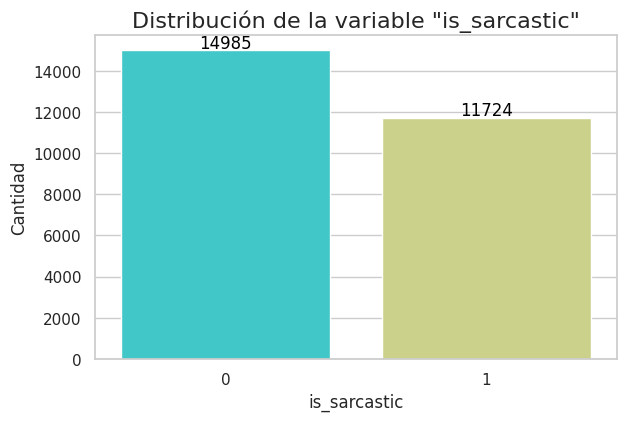

In [ ]:
sns.set(style="whitegrid", palette="hsv")
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='is_sarcastic', hue='is_sarcastic', palette='rainbow', legend=False)
plt.title('Distribución de la variable "is_sarcastic"', fontsize=16)  # Título más grande
plt.xlabel('is_sarcastic')
plt.ylabel('Cantidad')

# Cantidad de cada categoría
for i in ax.patches:
    height = int(i.get_height())
    ax.annotate(f'{height}', (i.get_x() + i.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.savefig('dist_var.png')

plt.show()

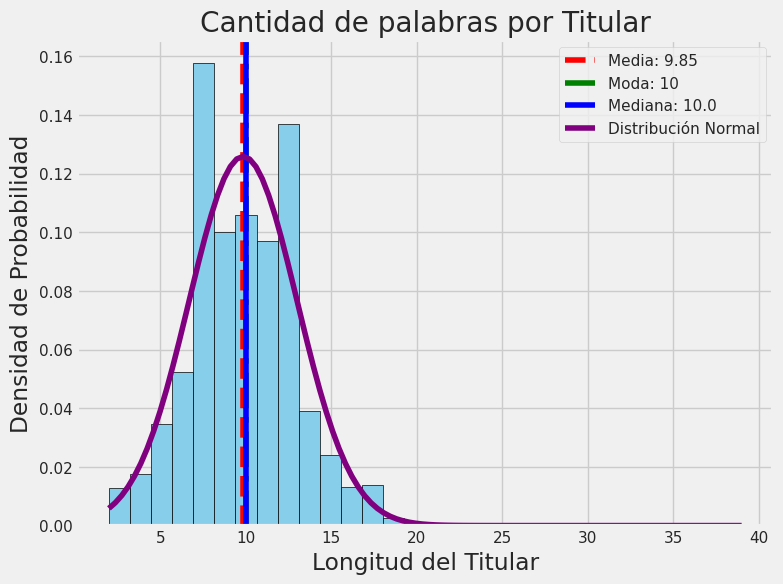

Coheficiente de sesgo:  -0.1459600185156482


In [ ]:
from scipy.stats import norm

df['length'] = df['headline'].apply(lambda x: len(x.split())) # Calculo de cantidad de palabras por titular
media = df['length'].mean()
std_dev = df['length'].std()
moda = df['length'].mode()[0]
mediana = df['length'].median()
std_dev = df['length'].std()

# Histograma de la longitud de los titulares
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 6))
plt.hist(df['length'], bins=30, color='skyblue', edgecolor='black', density=True)

# Líneas verticales para la media, moda y mediana
plt.axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
plt.axvline(moda, color='green', linestyle='-.', label=f'Moda: {moda}')
plt.axvline(mediana, color='blue', linestyle='-', label=f'Mediana: {mediana}')

# Trazar la campana
x = np.linspace(df['length'].min(), df['length'].max(), 100)
y = norm.pdf(x, media, std_dev)
plt.plot(x, y, color='purple', linestyle='-', label='Distribución Normal')

plt.title('Cantidad de palabras por Titular')
plt.xlabel('Longitud del Titular')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)

plt.savefig('cant_palb.png')

plt.show()

# Coheficiente de sesgo
p = (3*(media - mediana))/std_dev
print('Coheficiente de sesgo: ', p)

Dada una media, mediana y moda relativamente iguales la distrubucion es casi simetrica o normal, la media al ser menor a la modaindica que la grafica esta ligeramente sesgada a la izquierda, como indicada por el Coheficiente de sesgo: -0.14596


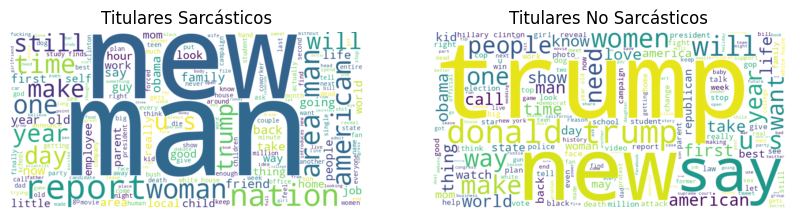

In [ ]:
# Filtrar titulares de noticias sarcásticas y no sarcásticas
titulares_sarcásticos = df[df['is_sarcastic'] == 1]['headline']
titulares_no_sarcásticos = df[df['is_sarcastic'] == 0]['headline']

# Concatenar todos los titulares de noticias sarcásticas y no sarcásticas
todos_titulares_sarcásticos = ' '.join(titulares_sarcásticos)
todos_titulares_no_sarcásticos = ' '.join(titulares_no_sarcásticos)

# Crear nubes de palabras para los titulares de noticias sarcásticas y no sarcásticas
wordcloud_sarcástico = WordCloud(width=800, height=400, background_color='white').generate(todos_titulares_sarcásticos)
wordcloud_no_sarcástico = WordCloud(width=800, height=400, background_color='white').generate(todos_titulares_no_sarcásticos)

# Mostrar las nubes de palabras
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_sarcástico, interpolation='bilinear')
plt.title('Titulares Sarcásticos')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_no_sarcástico, interpolation='bilinear')
plt.title('Titulares No Sarcásticos')
plt.axis('off')

plt.savefig('wordcloud_sarcastic.png')
plt.savefig('wordcloud_non_sarcastic.png')

plt.show()

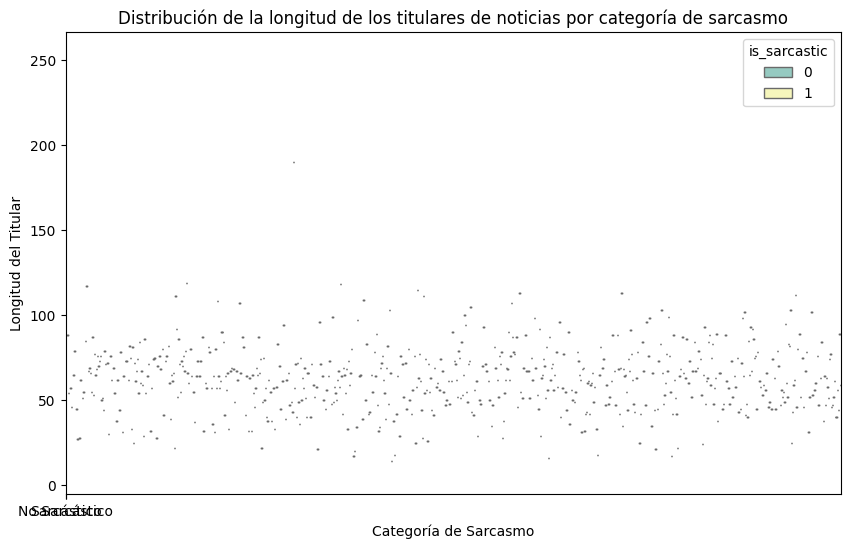

In [ ]:
# Crear un DataFrame separado para los titulares sarcásticos y no sarcásticos
df_sarcastic = df[df['is_sarcastic'] == 1]
df_non_sarcastic = df[df['is_sarcastic'] == 0]

# Crear el gráfico de caja o violín
plt.figure(figsize=(10, 6))
sns.boxplot(x='headline', y=df['headline'].apply(len), hue='is_sarcastic', data=df, palette='Set3', dodge=False)
plt.title('Distribución de la longitud de los titulares de noticias por categoría de sarcasmo')
plt.xlabel('Categoría de Sarcasmo')
plt.ylabel('Longitud del Titular')
plt.xticks([0, 1], ['No Sarcástico', 'Sarcástico'])

# Mostrar el gráfico
plt.legend(title='is_sarcastic')
plt.show()

# **PREPARACION DE LOS DATOS**

## DATA WRANGLING

### Manejo de valores faltantes o incorrectos

In [ ]:
# Detectar valores faltantes
missing_values = df.isnull().sum()

# Mostrar la cantidad de valores faltantes por columna
print(missing_values)

headline        0
is_sarcastic    0
article_link    0
dtype: int64


No se encontraron valores faltantes o nulos.

### Manejo de Duplicados

In [ ]:
duplicados = df[df.duplicated()]

# Mostrar solo los duplicados

print("Datos duplicados:")
print(duplicados)

# Eliminar duplicados y actualizar el DataFrame

df_sin_duplicados = df.drop_duplicates()

# Mostrar el DataFrame sin duplicados
print("DataFrame sin duplicados:")
print(df_sin_duplicados)

Datos duplicados:
                          headline  is_sarcastic  \
22014  hillary clinton vs. herself             0   

                                            article_link  length  
22014  https://www.huffingtonpost.comhttp://nymag.com...       4  
DataFrame sin duplicados:
                                                headline  is_sarcastic  \
0      former versace store clerk sues over secret 'b...             0   
1      the 'roseanne' revival catches up to our thorn...             0   
2      mom starting to fear son's web series closest ...             1   
3      boehner just wants wife to listen, not come up...             1   
4      j.k. rowling wishes snape happy birthday in th...             0   
...                                                  ...           ...   
26704               american politics in moral free-fall             0   
26705                            america's best 20 hikes             0   
26706                              reparations and 

Se encontro un solo dato duplicado

### Limpieza de datos

In [ ]:
# Se realiza nuevamente la descarga de datos sin procesar la URL ya que queremos entrenar al modelo solo con los datos de 'headline' y 'is_sarcastic'

!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sarcasm.json \
    -O /tmp/sarcasm.json

with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])



--2024-04-25 16:36:27--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.207, 172.253.122.207, 172.253.63.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.1s    

2024-04-25 16:36:27 (45.9 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



## Tokenizar y Rellenear (Transformacion de datos)

Tokenizer de TensorFlow Keras para convertir secuencias de texto en secuencias de números enteros y la función pad_sequences para rellenar las secuencias de diferentes longitudes para que todas tengan la misma longitud.


Cuando se utiliza el tokenizador para convertir secuencias de texto en secuencias de números enteros, si encuentra una palabra que no está presente en su vocabulario (es decir, una palabra que no se ha visto durante el ajuste del tokenizador), la reemplazará por el token OOV <OOV>.

Las palabras con el token de menor número son las mas comunes, las de numeros mas altos son las que menos se utilizaron en el conjunto de datos.

In [ ]:
# Creación del tokenizador
tokenizer = Tokenizer(oov_token="<OOV>")
# Se ajusta el tokenizador al texto de entrada utilizando el método fit_on_texts. Esto construye un índice de palabras basado en el texto proporcionado.
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index # Índice de palabras
print('cantidad total de palabras únicas:', len(word_index))
print('\nPalabras apendidas del dataset:\n', word_index)

# Conversión de texto a secuencias de números enteros
sequences = tokenizer.texts_to_sequences(sentences)
# Rellenar con ceros para que todas tengan la misma longitud, las mas cortar se rellenaran con 0 al final.
padded = pad_sequences(sequences, padding='post')
print('\nEjemplo del primer titular:\n', padded[0])
print('\nOraciones rellenadas:', padded.shape[0], ', cada una con', padded.shape[1], 'valores de longitud')

cantidad total de palabras únicas: 29657

Palabras apendidas del dataset:
 {'<OOV>': 1, 'to': 2, 'of': 3, 'the': 4, 'in': 5, 'for': 6, 'a': 7, 'on': 8, 'and': 9, 'with': 10, 'is': 11, 'new': 12, 'trump': 13, 'man': 14, 'from': 15, 'at': 16, 'about': 17, 'you': 18, 'this': 19, 'by': 20, 'after': 21, 'up': 22, 'out': 23, 'be': 24, 'how': 25, 'as': 26, 'it': 27, 'that': 28, 'not': 29, 'are': 30, 'your': 31, 'his': 32, 'what': 33, 'he': 34, 'all': 35, 'just': 36, 'who': 37, 'has': 38, 'will': 39, 'more': 40, 'one': 41, 'into': 42, 'report': 43, 'year': 44, 'why': 45, 'have': 46, 'area': 47, 'over': 48, 'donald': 49, 'u': 50, 'day': 51, 'says': 52, 's': 53, 'can': 54, 'first': 55, 'woman': 56, 'time': 57, 'like': 58, 'her': 59, "trump's": 60, 'old': 61, 'no': 62, 'get': 63, 'off': 64, 'an': 65, 'life': 66, 'people': 67, 'obama': 68, 'now': 69, 'house': 70, 'still': 71, "'": 72, 'women': 73, 'make': 74, 'was': 75, 'than': 76, 'white': 77, 'back': 78, 'my': 79, 'i': 80, 'clinton': 81, 'down':

## Test & Training

In [ ]:
vocab_size = 10000        # Número máximo de palabras únicas que se tendrán en cuenta durante el entrenamiento del modelo.
embedding_dim = 16        # Cada palabra se representará como un vector denso de este tamaño.
max_length = 100          # Longitud máxima de las secuencias de texto.
trunc_type='post'         # Especifica cómo se truncarán las secuencias si su longitud excede.
padding_type='post'       # Especifica cómo se rellenarán las secuencias si su longitud es menor que max_length.
oov_tok = "<OOV>"         # Token que se utilizará para representar palabras fuera de vocabulario durante el entrenamiento del modelo.
training_size = 20000     # Tamaño del conjunto de entrenamiento.

In [ ]:
training_sentences = sentences[0:training_size]  # Contiene las oraciones de entrenamiento, desde 0 hasta el tamaño indicado (20000)
testing_sentences = sentences[training_size:]    # Contiene las oraciones de prueba que seran a partie del tamaño de entrenamiento
training_labels = labels[0:training_size]        # Contiene las primeras training_size etiquetas correspondientes a las oraciones en training_sentences
testing_labels = labels[training_size:]          # Contiene las etiquetas restantes correspondientes a las oraciones en testing_sentences.

*  Convertir las oraciones de texto en secuencias de números enteros y luego rellenar esas secuencias para que tengan la misma longitud:

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)  # Se crea token con el tamaño indicado y el token de vocabulario externo
# índice de palabras basado en las palabras en el conjunto de entrenamiento.
tokenizer.fit_on_texts(training_sentences)

# Asignar a cada palabra única un número entero
word_index = tokenizer.word_index

# Datos de entrenamiento
training_sequences = tokenizer.texts_to_sequences(training_sentences) # Conviertir en secuencias de números enteros las oraciones
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type) # Rellenar secuencias

# Datos de prueba
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
# Convertir las secuencias y etiquetas de entrenamiento y prueba en matrices NumPy
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

Esto se hace para asegurar que los datos estén en el formato adecuado para el modelos de aprendizaje automático.

Convertir los datos a matrices NumPy permite realizar operaciones y cálculos eficientes en ellos, ya que las bibliotecas de aprendizaje automático en Python generalmente están optimizadas para trabajar con matrices NumPy.

# **MODELADO**

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


##**Algoritmo**

Vamos a aplicar el concepto de **Embedding** que convierte el sentimiento de una palabra en un numero, de la misma manera que se tokeniza las palabras.

En este caso la incrustacion es un vector con una direccion que utilisaremos para establecer encuentros en palabras:

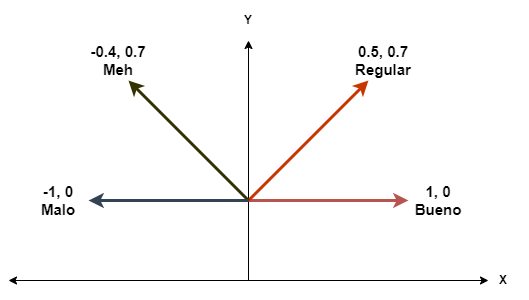



**Red neuronal convolucional (CNN):**

Se eligio este tipo de arquitectura porque es comúnmente utilizada para tareas de clasificación de texto debido a su eficacia en la extracción de características importantes de las secuencias de palabras.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

El modelo es una incrustacion seguida de una reduccion promedio global, luego una capa densa de 24 neuronas y otra capa densa de salida con una sola neurona, esta es un clasificador binario con una neurona activada por 'sigmoid'

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160433 (626.69 KB)
Trainable params: 160433 (626.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Entrenamiento

In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 3s - loss: 0.6678 - accuracy: 0.5867 - val_loss: 0.5920 - val_accuracy: 0.6837 - 3s/epoch - 5ms/step
Epoch 2/30
625/625 - 3s - loss: 0.4436 - accuracy: 0.8255 - val_loss: 0.3947 - val_accuracy: 0.8340 - 3s/epoch - 5ms/step
Epoch 3/30
625/625 - 2s - loss: 0.3154 - accuracy: 0.8757 - val_loss: 0.3546 - val_accuracy: 0.8529 - 2s/epoch - 3ms/step
Epoch 4/30
625/625 - 2s - loss: 0.2628 - accuracy: 0.8977 - val_loss: 0.3450 - val_accuracy: 0.8554 - 2s/epoch - 3ms/step
Epoch 5/30
625/625 - 2s - loss: 0.2275 - accuracy: 0.9129 - val_loss: 0.3543 - val_accuracy: 0.8456 - 2s/epoch - 3ms/step
Epoch 6/30
625/625 - 2s - loss: 0.1995 - accuracy: 0.9243 - val_loss: 0.3642 - val_accuracy: 0.8462 - 2s/epoch - 3ms/step
Epoch 7/30
625/625 - 2s - loss: 0.1781 - accuracy: 0.9336 - val_loss: 0.3693 - val_accuracy: 0.8502 - 2s/epoch - 3ms/step
Epoch 8/30
625/625 - 3s - loss: 0.1588 - accuracy: 0.9420 - val_loss: 0.3900 - val_accuracy: 0.8468 - 3s/epoch - 5ms/step
Epoch 9/30
625/625 - 2s 

 El modelo logra una pérdida muy baja y una alta precisión en los datos de entrenamiento, con una pérdida de aproximadamente 0.0318 y una precisión del 99.20%. Esto sugiere que el modelo ha aprendido bien los patrones presentes en los datos de entrenamiento y es capaz de clasificarlos con alta precisión.

 **Sobreajuste:** Dado que el rendimiento en los datos de entrenamiento es significativamente mejor que en los datos de validación, puede haber cierto grado de sobreajuste. Esto significa que el modelo puede haber aprendido características específicas de los datos de entrenamiento que no son generalizables y que no se aplican a otros datos.

 **Posibles mejoras:** Aunque el modelo alcanza una buena precisión en los datos de validación, todavía hay margen para mejorar. Se podrían explorar diferentes arquitecturas de modelos, ajustes de hiperparámetros, técnicas de regularización y preprocesamiento de datos para intentar mejorar aún más el rendimiento del modelo y reducir cualquier sobreajuste presente.


# EVALUACIÓN DEL MODELO

## Desempeño del modelo

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print('Patron de entrenamiento:\n', training_padded[2])
print('Oración original: ', training_sentences[2])
print('Etiqueta:', labels[2])

Patron de entrenamiento:
 [ 153  890    2  891 1445 2215  595 5650  221  133   36   45    2 8864
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
Oración original:  mom starting to fear son's web series closest thing she will have to grandchild
Etiqueta: 1


Como se puede observar en el patron de entrenamiento las palabras se han tokenizado y rellenado con 0 ya que la oracion es mas corta que la longitud maxima de oracion. Para evitar el sobreajuste es ajustar la longitud de la oracion para que no termine con tantos 0, aca se uso el comportamiento por defecto.

**Desempeño del modelo entrenado para predecir si las oraciones dadas son sarcásticas o no:**

In [ ]:
sentence = ["granny starting to fear spiders in the garden might be real", "Harry Potter final movie showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence) # Tokenizar
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type) # Rellenar

print('Oracione dadas:\n', sentence[0], '\n', sentence[1])
print(model.predict(padded)) # Utilizar el modelo entrenado para predecir.

Oracione dadas:
 granny starting to fear spiders in the garden might be real 
 Harry Potter final movie showing this sunday night
1/1 [==============================] - 0s 99ms/step
[[8.1426215e-01]
 [7.0691658e-10]]



El resultado de la predicción indica que:


*   La primera oración **"La abuela empieza a temer que las arañas en el jardín puedan ser reales"** ("granny starting to fear spiders in the garden might be real") tiene una **alta probabilidad** de ser sarcástica, con una probabilidad cercana a 0.94 (aproximadamente 93.8%).
*   La segunda oración **"La última película de Harry Potter se proyecta este domingo por la noche"** ("Harry Potter final movie showing this sunday night") tiene una probabilidad **extremadamente baja** de ser sarcástica, con una probabilidad muy cercana a cero (aproximadamente 0.0000000035%).

Estos resultados sugieren que el modelo considera que la primera oración es muy probablemente sarcástica, mientras que la segunda oración es casi definitivamente no sarcástica.

## **Evolucion de la precisión y la pérdida del modelo durante el entrenamiento y la validación:**

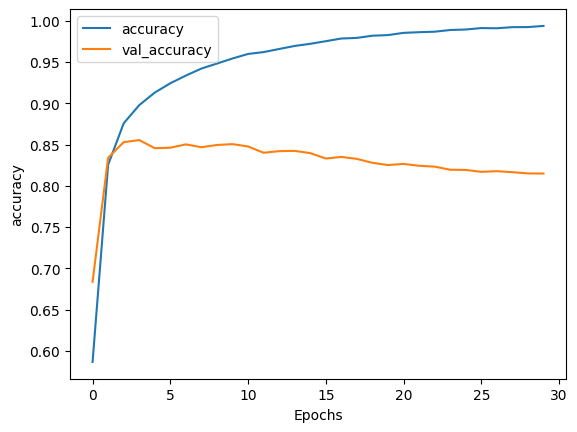

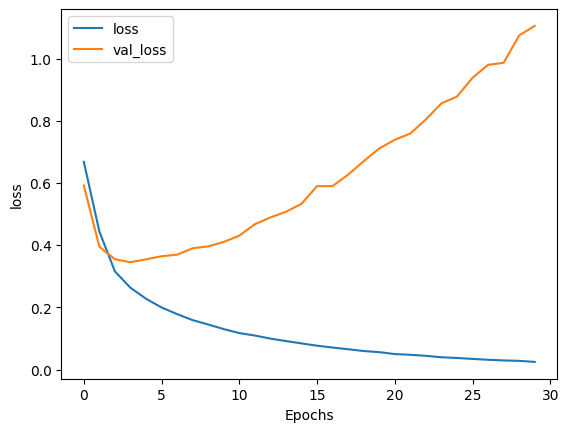

In [18]:
def plot_graphs(history, string, save_file):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.savefig(save_file)
    plt.show()

plot_graphs(history, "accuracy", 'accuracy.png')
plot_graphs(history, "loss", 'loss.png')

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print('Hay', weights.shape[0], 'palabras aprendidas')
print('Incrustaciones aprendidas: ', weights.shape[1])

Hay 10000 palabras en el vocabulario
Cada palabra está representada por un vector de embedding de longitud 16


# **DEVELOPMENT**

In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

https://projector.tensorflow.org/